# Анализ поведения пользователей в мобильном приложении

<h1>Содержание<span class="tocSkip"></span></h1>
<li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-данных-датасета" data-toc-modified-id="Изучение-данных-датасета-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение данных датасета</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение воронки событий</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-итогов-теста" data-toc-modified-id="Изучение-итогов-теста-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Изучение итогов теста</a></span><ul class="toc-item"><li><span><a href="#Проверка-статистически-значимого-различия-между-контрольными-группами" data-toc-modified-id="Проверка-статистически-значимого-различия-между-контрольными-группами-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Проверка статистически значимого различия между контрольными группами</a></span></li><li><span><a href="#Проверка-статистически-значимого-различия-между-контрольной-группой-246-и-тестовой-группой" data-toc-modified-id="Проверка-статистически-значимого-различия-между-контрольной-группой-246-и-тестовой-группой-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка статистически значимого различия между контрольной группой 246 и тестовой группой</a></span></li><li><span><a href="#Проверка-статистически-значимого-различия-между-контрольной-группой-247-и-тестовой-группой" data-toc-modified-id="Проверка-статистически-значимого-различия-между-контрольной-группой-247-и-тестовой-группой-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Проверка статистически значимого различия между контрольной группой 247 и тестовой группой</a></span></li><li><span><a href="#Проверка-статистически-значимого-различия-между-объеденённой-контрольной-группой-и-тестовой-группой" data-toc-modified-id="Проверка-статистически-значимого-различия-между-объеденённой-контрольной-группой-и-тестовой-группой-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Проверка статистически значимого различия между объеденённой контрольной группой и тестовой группой</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Общий-комментарий" data-toc-modified-id="Общий-комментарий-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий комментарий</a></span></li></ul></div>

# Описание проекта

***Цели:*** `Изучить поведение пользователей мобильного приложения и проверить гипотезы по пользованию приложением`

***Задачи:***
1. Ознакомиться с данными
2. Изучить вопронку продаж
3. Исследование результатов A/A/B-эксперимента по изменению шрифтов в приложении
4. Сделать выводы по результатам теста, воронке продаж

## Подготовка данных

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime 
from datetime import datetime as DT
import math as mth
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')

In [3]:
df.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
#проверяем пропуски в столбцах
df.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [6]:
#проверяем дубликаты
df.duplicated().sum()

413

In [7]:
#удаляем дубликаты из датасета
df = df.drop_duplicates()

In [8]:
#поищем пользователей, которые попали в две группы одновременно
user_in_2group = df.groupby(by = 'DeviceIDHash', as_index = False).agg({"ExpId":'nunique'}).sort_values('ExpId', ascending = False)                                                   
user_in_2group

,DeviceIDHash,ExpId
0,6888746892508752,1
5030,6207768971558512760,1
5042,6217807653094995999,1
5041,6217295124800833842,1
5040,6216080220799726690,1
...,...,...
2513,3175239243679501019,1
2512,3171891164497446149,1
2511,3171454373076660766,1
2510,3170212200647575044,1


In [9]:
# добавляем столбцы с датой и датой с времнем
df['Time'] = pd.to_datetime(df['EventTimestamp'], unit='s')
df['Date'] = df['Time'].dt.date
df

,EventName,DeviceIDHash,EventTimestamp,ExpId,Time,Date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


### Вывод

``` В датасете нашлось 413 дублирующих строк, которые были удалены. ```

``` Пропущенных значений не было обнаружено.```

``` Также, были добавлены два столбца с данным о дне события и с данными дня и времени.```

``` Пользователей, которые попали в несколько групп не было обнаружено. ```

## Изучение данных датасета

In [10]:
# проверяем кол-во уникальных значений в каждом столбце
df.nunique()

EventName              5
DeviceIDHash        7551
EventTimestamp    176654
ExpId                  3
Time              176654
Date                  14
dtype: int64

In [11]:
print('Всего событий в датасете - ', df.shape[0])

Всего событий в датасете -  243713


In [12]:
print('Всего пользователей в датасете - ', df['DeviceIDHash'].nunique())

Всего пользователей в датасете -  7551


In [13]:
print('Среднее число событий на пользователя - ', round(df.shape[0]/df['DeviceIDHash'].nunique()))

Среднее число событий на пользователя -  32


array([[<AxesSubplot:title={'center':'EventTimestamp'}>]], dtype=object)

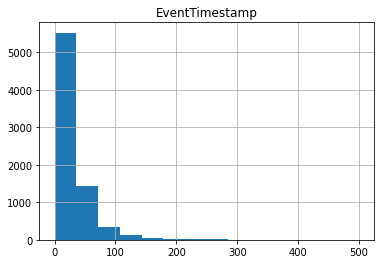

In [14]:
plt.xlim
df.groupby(by= 'DeviceIDHash').agg({'EventTimestamp':'count'}).hist(bins = 14, range = [0,500])

In [15]:
plt.xlim
df.groupby(by= 'DeviceIDHash').agg({'EventTimestamp':'count'}).describe()

,EventTimestamp
count,7551.000000
mean,32.275593
std,65.154219
min,1.000000
25%,9.000000
50%,20.000000
75%,37.000000
max,2307.000000


***Вывод:***

По гистограмме видно, что у распределения большой хвост, поэтому брать ср. значение тут не корректно. Возьмем медиану. Примерно половина пользователей совершает примерно < 20 событий, половина > 20 событий.


In [16]:
min_date = df['Date'].min()
max_date = df['Date'].max()
print(f'Дата начала периода - {min_date} , конец периода {max_date}')

Дата начала периода - 2019-07-25 , конец периода 2019-08-07


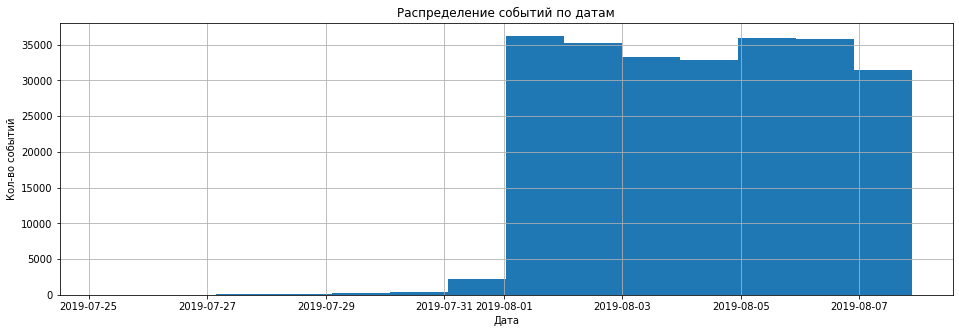

In [17]:
df[['EventName', 'Time']].hist(figsize=(16, 5), bins = 14)
plt.title('Распределение событий по датам')
plt.xlabel('Дата')
plt.ylabel('Кол-во событий');

***Вывод:***

```
Видно, что события стали собираться только с 07-27, а подавляющее большинство всех событий начало собираться только с 08-01. Возможно, это связано с тем, что пользователи не сразу начали обновлять приложение и большинство пользователей увидели изменения только с 1 августа.
```

In [23]:
# создадим новый датасет с нужным диапазоном
new_df = df[df['Time'] >= DT.strptime('20190801', '%Y%m%d')]
new_df

,EventName,DeviceIDHash,EventTimestamp,ExpId,Time,Date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [24]:
drop_users = df['DeviceIDHash'].nunique() - new_df['DeviceIDHash'].nunique()
print(f'После "обрезания" датасета по дате мы потеряли {df.shape[0] - new_df.shape[0]} событий и {drop_users} пользователей')

После "обрезания" датасета по дате мы потеряли 2826 событий и 17 пользователей


In [25]:
print('Количество уникальных групп в датасете -',new_df['ExpId'].nunique() )

Количество уникальных групп в датасете - 3


### Вывод

```
Событий в логе всего - 243713 (до чистки), если считать уникальных событий - 5
Всего пользователей в логе -  7551
Примерно половина пользователей совершает примерно < 20 событий, половина > 20 событий.
В нашем расположении полные данные только с 2019-08-01, однако дата начала теста - 2019-07-25. Возможно, это связано с тем, что пользователи не сразу начали обновлять приложение и большинство пользователей увидели изменения только с 1 августа.
После чистки датасета по дате мы потеряли 2826 (~1%) событий и 17 (менее 1%) пользователей. Количество групп по прежнему осталось - 3.

```

## Изучение воронки событий

In [26]:
# посчитаем, сколько раз встречается событие в датасете
count_events = new_df.groupby(by = 'EventName').agg({'DeviceIDHash':'count'}).sort_values(by= 'DeviceIDHash', ascending = False).reset_index()
count_events

,EventName,DeviceIDHash
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [27]:
# посчитаем, сколько пользователей совершили событие
events_by_users = new_df.groupby(by = 'EventName').agg({'DeviceIDHash':'nunique'}).sort_values(by= 'DeviceIDHash', ascending = False).reset_index()
events_by_users

,EventName,DeviceIDHash
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [28]:
# добавим столбец, в котором рассчитаем долю пользователей, совершивших событие
events_by_users['RrcAllUsers'] = round(events_by_users['DeviceIDHash']/new_df['DeviceIDHash'].nunique(), 2)
events_by_users

,EventName,DeviceIDHash,RrcAllUsers
0,MainScreenAppear,7419,0.98
1,OffersScreenAppear,4593,0.61
2,CartScreenAppear,3734,0.50
3,PaymentScreenSuccessful,3539,0.47
4,Tutorial,840,0.11


In [29]:
# добавим столбец, в котором рассчитаем долю пользователей, перешедших на следующий шаг
events_by_users['UserShareNextStep'] = round(events_by_users['DeviceIDHash'].shift(0)/events_by_users['DeviceIDHash'].shift(1), 2)
events_by_users

,EventName,DeviceIDHash,RrcAllUsers,UserShareNextStep
0,MainScreenAppear,7419,0.98,NaN
1,OffersScreenAppear,4593,0.61,0.62
2,CartScreenAppear,3734,0.50,0.81
3,PaymentScreenSuccessful,3539,0.47,0.95
4,Tutorial,840,0.11,0.24


In [30]:
# добавим столбец, в котором рассчитаем долю пользователей, дошедших до события от первого события
events_by_users['UserShareStart'] = round(events_by_users['DeviceIDHash']/events_by_users['DeviceIDHash'][0], 2)
events_by_users

,EventName,DeviceIDHash,RrcAllUsers,UserShareNextStep,UserShareStart
0,MainScreenAppear,7419,0.98,NaN,1.00
1,OffersScreenAppear,4593,0.61,0.62,0.62
2,CartScreenAppear,3734,0.50,0.81,0.50
3,PaymentScreenSuccessful,3539,0.47,0.95,0.48
4,Tutorial,840,0.11,0.24,0.11


### Вывод

```
Самое популярное событие - MainScreenAppear с количество повторений в логе - 117328 (на 7419 пользователей)

Наименее популярное событие - Tutorial с количество повторений в логе - 1005 (840)

Предположительно, воронка строится следующим образом: 

MainScreenAppear ==> OffersScreenAppear ==> CartScreenAppear ==> PaymentScreenSuccessful

Одно из событий - Tutorial, не вписывается в последовательную воронку, так как совершить событие Tutorial можно на любом из предыдущих шагов, но скорее всего, его совершают после события CartScreenAppear.

Больше всего (38%) пользователей теряется после первого шага (переход с MainScreenAppear на OffersScreenAppear). При этом, 48% пользователей доходит до оплаты.

```

## Изучение итогов теста

In [31]:
# посчитаем кол-во пользователей в каждой группе
groups = new_df.groupby(by = 'ExpId').agg({'DeviceIDHash':'nunique'}).reset_index()
groups

,ExpId,DeviceIDHash
0,246,2484
1,247,2513
2,248,2537


In [32]:
# функция для расчета стат.значимости разницы долей
def z_test(trials,successes,alpha=0.05):

    successes = np.array(successes)
    
    trials = np.array(trials)
    
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    return p_value

### Проверка статистически значимого различия между контрольными группами

```
H0 - Стат. значимое различие между группами нет
H1 - Стат. значимое различие между группами есть 
```

In [33]:
# проверяем различия между контрольными группами
for events in new_df['EventName'].unique():
    data = new_df[new_df['EventName'] == events]
    successes = [data[data['ExpId'] == 246]['DeviceIDHash'].nunique(), data[data['ExpId'] == 247]['DeviceIDHash'].nunique()]
    trials = [new_df[new_df['ExpId'] == 246]['DeviceIDHash'].nunique(), new_df[new_df['ExpId'] == 247]['DeviceIDHash'].nunique()]
    p_value = z_test(trials,successes)
    results = [events, p_value]
    print(results)

['Tutorial', 0.9376996189257114]
['MainScreenAppear', 0.7570597232046099]
['OffersScreenAppear', 0.2480954578522181]
['CartScreenAppear', 0.22883372237997213]
['PaymentScreenSuccessful', 0.11456679313141849]


***Вывод:***
```Нет статистически значимой разницы между группами, так и должно быть, тк обе группы контроьные```

### Проверка статистически значимого различия между контрольной группой 246 и тестовой группой

```
H0 - Стат. значимое различие между группами нет
H1 - Стат. значимое различие между группами есть 
```

In [34]:
# проверяем различия между контрольной группой 246 и тестовой группой
for events in new_df['EventName'].unique():
    data = new_df[new_df['EventName'] == events]
    successes = [data[data['ExpId'] == 246]['DeviceIDHash'].nunique(), data[data['ExpId'] == 248]['DeviceIDHash'].nunique()]
    trials = [new_df[new_df['ExpId'] == 246]['DeviceIDHash'].nunique(), new_df[new_df['ExpId'] == 248]['DeviceIDHash'].nunique()]
    p_value = z_test(trials,successes)
    results = [events, p_value]
    print(results)

['Tutorial', 0.8264294010087645]
['MainScreenAppear', 0.2949721933554552]
['OffersScreenAppear', 0.20836205402738917]
['CartScreenAppear', 0.07842923237520116]
['PaymentScreenSuccessful', 0.2122553275697796]


***Вывод:***
```Так как p-value по всем событиям > 0.05 мы не можем отвергнуть нулевую гипотезу```

### Проверка статистически значимого различия между контрольной группой 247 и тестовой группой

```
H0 - Стат. значимое различие между группами нет
H1 - Стат. значимое различие между группами есть 
```

In [35]:
# проверяем различия между контрольной группой 246 и тестовой группой
for events in new_df['EventName'].unique():
    data = new_df[new_df['EventName'] == events]
    successes = [data[data['ExpId'] == 247]['DeviceIDHash'].nunique(), data[data['ExpId'] == 248]['DeviceIDHash'].nunique()]
    trials = [new_df[new_df['ExpId'] == 247]['DeviceIDHash'].nunique(), new_df[new_df['ExpId'] == 248]['DeviceIDHash'].nunique()]
    p_value = z_test(trials,successes)
    results = [events, p_value]
    print(results)

['Tutorial', 0.765323922474501]
['MainScreenAppear', 0.4587053616621515]
['OffersScreenAppear', 0.9197817830592261]
['CartScreenAppear', 0.5786197879539783]
['PaymentScreenSuccessful', 0.7373415053803964]


***Вывод:***
```Так как p-value по всем событиям > 0.05 мы не можем отвергнуть нулевую гипотезу```

### Проверка статистически значимого различия между объеденённой контрольной группой и тестовой группой

```
H0 - Стат. значимое различие между группами нет
H1 - Стат. значимое различие между группами есть 
```

In [36]:
# проверяем различия между контрольной группой 246 и тестовой группой
for events in new_df['EventName'].unique():
    data = new_df[new_df['EventName'] == events]
    successes = [data[data['ExpId'] != 248]['DeviceIDHash'].nunique(), data[data['ExpId'] == 248]['DeviceIDHash'].nunique()]
    trials = [new_df[new_df['ExpId'] != 248]['DeviceIDHash'].nunique(), new_df[new_df['ExpId'] == 248]['DeviceIDHash'].nunique()]
    p_value = z_test(trials,successes)
    results = [events, p_value]
    print(results)

['Tutorial', 0.764862472531507]
['MainScreenAppear', 0.29424526837179577]
['OffersScreenAppear', 0.43425549655188256]
['CartScreenAppear', 0.18175875284404386]
['PaymentScreenSuccessful', 0.6004294282308704]


***Вывод:***
```Так как p-value по всем событиям > 0.05 мы не можем отвергнуть нулевую гипотезу```

### Вывод

```
В контрольной группе 246 - 2484 пользователя

В контрольной группе 247 - 2513 пользователей

В тестовой группе 248 - 2537 пользователей

Группа 246 и 247 не различаются стат. значимо, это может нам сказать, что разбиение на группы работает корректно.

Что с разбивкой по двум группам, что с объеденённой группой, мы можем сказать, что p-value по всем событиям > 0.05 и мы не можем отвергнуть нулевую гипотезу теста.

Выбранный уровень стат.значимости - 0.05. Менять его не вижу смыслу, тк это стандартный уровень для большинства тестов, понижение точно ничего не даст, а повышение - приведет к слишком высокой вероятности ошибки.

```

## Вывод

```
1. Событий в логе всего - 243713 (до чистки), если считать уникальных событий - 5

2. Всего пользователей в логе -  7551 (до чистки)

3. Примерно половина пользователей совершает примерно < 20 событий, половина > 20 событий.

4. В нашем расположении полные данные только с 2019-08-01, однако дата начала теста - 2019-07-25. Возможно, это связано с тем, что пользователи не сразу начали обновлять приложение и большинство пользователей увидели изменения только с 1 августа.

5. После чистки датасета по дате мы потеряли 2826(~1%) событий и 17(менее 1%) пользователей. Количество групп по прежнему осталось - 3.

6. Самое популярное событие - MainScreenAppear с количество повторений в логе - 117328 (на 7419 пользователей)

7. Наименее популярное событие - Tutorial с количество повторений в логе - 1005 (840).

8. Предположительно, воронка строится следующим образом: 

MainScreenAppear ==> OffersScreenAppear ==> CartScreenAppear ==> PaymentScreenSuccessful

9. Одно из событий - Tutorial, не вписывается в последовательную воронку, так как совершить событие Tutorial можно на любом из предыдущих шагов, но скорее всего, его совершают после события CartScreenAppear.

10. Больше всего (38%) пользователей теряется после первого шага (переход с MainScreenAppear на OffersScreenAppear). При этом, 48% пользователей доходит до оплаты.

11. В контрольной группе 246 - 2484 пользователя. В контрольной группе 247 - 2513 пользователей. В тестовой группе 248 - 2537 пользователей

12. Группа 246 и 247 не различаются стат. значимо, это может нам сказать, что разбиение на группы работает корректно.

13. Что с разбивкой по двум группам, что с объеденённой группой, мы можем сказать, что p-value по всем событиям > 0.05 и мы не можем отвергнуть нулевую гипотезу теста.

14. Выбранный уровень стат.значимости - 0.05. Менять его не вижу смыслу, тк это стандартный уровень для большинства тестов, понижение точно ничего не даст, а повышение - приведет к слишком высокой вероятности ошибки.

Я бы продолжил тест как минимум до 2 недель, это поможет нам увеличить выборку, что в свою очередь даст более точный результат и возможно, мы сможем набрать достаточный объем для стат.значимого результата.

Проблему текущего теста заключается в том, что в первую неделю (то есть половина всего теста) события вообще не приходили, соотвественно, это помешало собрать достаточно данных для стат.значимого результата.
```